## zero weight initialization using ReLu activation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv',header = None, names = ['X','Y','class'])

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


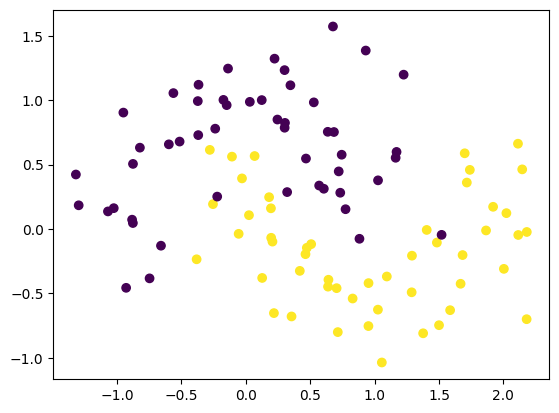

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])
plt.show()

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

model.summary()

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
initial_weights = model.get_weights()
initial_weights

[array([[ 0.51976204, -0.21186757],
        [ 0.5372398 ,  0.5386393 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.34361243],
        [0.84461343]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.5078 - loss: 7.9331 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5234 - loss: 7.6813 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5156 - loss: 7.8072 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4844 - loss: 8.3109 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4531 - loss: 8.8146 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4883 - loss: 8.2479 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5312 - loss: 7.5554 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5078 - loss: 7.9331 - val_accuracy: 0.5000 - val_loss

In [14]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

- ### After 100 epochs of training weights are still zero

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 760us/step


<Axes: >

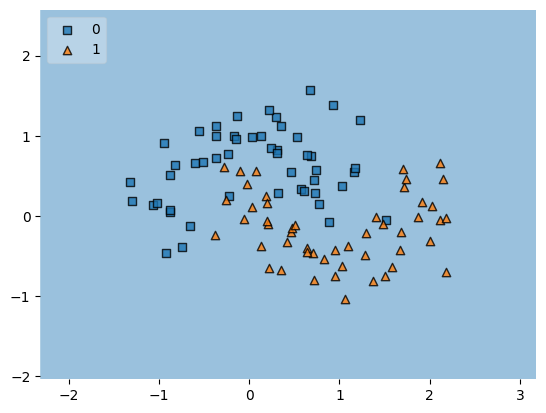

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## Using tanh activation function

In [16]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='tanh'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
initial_weights = model.get_weights()
initial_weights

[array([[-0.6026736 , -0.42906326],
        [-0.86021435,  0.39258635]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.07105517],
        [-0.38338625]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5039 - loss: 7.9961 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4961 - loss: 8.1220 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 8.0590 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5195 - loss: 7.7442 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4727 - loss: 8.4998 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4961 - loss: 8.1220 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5117 - loss: 7.8702 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5234 - loss: 7.6813 - val_accuracy: 0.5000 - val_loss:

In [22]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

- ### No weight updation

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 669us/step


<Axes: >

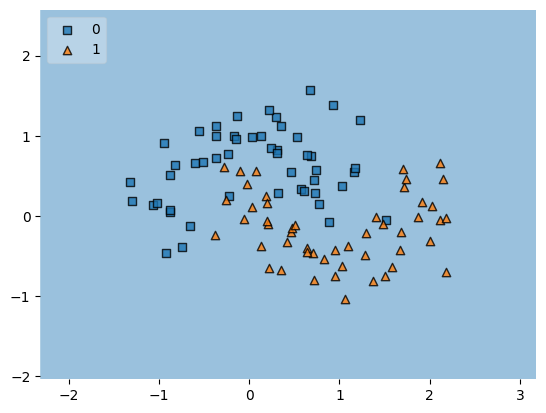

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## Using sigmoid activation

- here the model fails to capture the non linearity and behaves as linear model. All the weights going to a particular is same , so it behaves as a single node, and no matter how many nodes we add in the hidden layer it acts as a single node and fails to capture any non linearity

In [24]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
initial_weights = model.get_weights()
initial_weights

[array([[-0.60555947, -0.29629874],
        [ 0.6881794 , -0.6244789 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3950793 ],
        [-0.44425946]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4344 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4516 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5508 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [30]:
model.get_weights()

[array([[-0.47933936, -0.47933936],
        [ 0.5063723 ,  0.5063723 ]], dtype=float32),
 array([-0.01913796, -0.01913796], dtype=float32),
 array([[-0.10272948],
        [-0.10272948]], dtype=float32),
 array([0.01747928], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 970us/step


<Axes: >

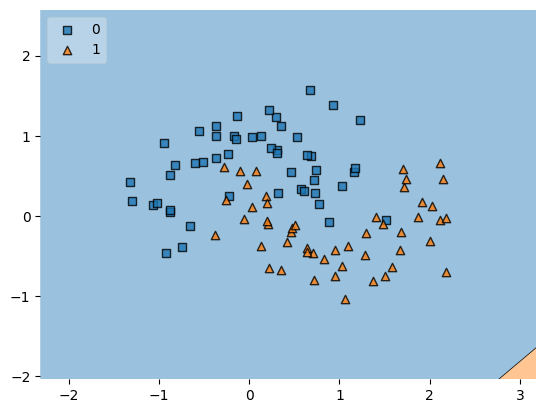

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## Xavier weight initialization

- for tanh and sigmoid

In [32]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
initial_weights = model.get_weights()

In [35]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [36]:
model.set_weights(initial_weights)

In [37]:
model.get_weights()

[array([[-0.0832405 , -1.351976  , -0.6108421 ,  0.13592567, -0.02754203,
         -0.7300888 ,  0.57712114,  0.3650976 , -0.41342527, -0.75899976],
        [ 0.72638226,  0.3676806 , -1.7280056 , -0.05146511,  0.08099774,
         -0.24981424,  0.5075009 , -0.73966366,  0.43406034, -0.39147192]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.13853782, -0.18165256, -0.38294807,  0.10365925,  0.40367767,
          0.08366816, -0.25166535,  0.07041008, -0.17404382,  0.22649494],
        [-0.1350189 , -0.6235236 , -0.29837883,  0.2120948 ,  0.41992122,
         -0.1216946 ,  0.17312588, -0.38772964,  0.3763175 , -0.18889786],
        [ 0.1719536 ,  0.15632305, -0.23561592,  0.07485869, -0.03409647,
         -0.3341424 ,  0.47993344,  0.11616914,  0.19759145,  0.42345032],
        [ 0.03519736,  0.8039253 , -0.47916415, -0.4616993 , -0.10346307,
          0.06675351, -0.52949333,  0.05660588,  0.14611684, -0.12870626],
        [-0.02367

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.2336 - loss: 0.7920 - val_accuracy: 0.1500 - val_loss: 0.8184
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2320 - loss: 0.7852 - val_accuracy: 0.1500 - val_loss: 0.7976
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2852 - loss: 0.7595 - val_accuracy: 0.1500 - val_loss: 0.7774
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2664 - loss: 0.7493 - val_accuracy: 0.1500 - val_loss: 0.7578
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2922 - loss: 0.7331 - val_accuracy: 0.1500 - val_loss: 0.7393
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3250 - loss: 0.7190 - val_accuracy: 0.2000 - val_loss: 0.7209
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3898 - loss: 0.7047 - val_accuracy: 0.4000 - val_loss: 0.7027
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5383 - loss: 0.6883 - val_accuracy: 0.7500 - val_loss

In [39]:
model.get_weights()

[array([[-0.20632473, -1.2357147 , -0.5963584 ,  0.04681727, -0.13847855,
         -0.7172352 ,  0.65615946,  0.40497795, -0.3644251 , -0.7310905 ],
        [ 0.80598503,  0.47346285, -1.7716029 ,  0.02432631,  0.16915925,
         -0.3465    ,  0.5900274 , -0.76272076,  0.4629988 , -0.31927222]],
       dtype=float32),
 array([-0.04286294,  0.17660655,  0.13329597, -0.22538927,  0.01771672,
         0.09444638,  0.03301359, -0.01699029,  0.04549306, -0.06978984],
       dtype=float32),
 array([[-0.25201485, -0.21474992, -0.48829693,  0.2115412 ,  0.31284583,
          0.07821049, -0.33688   ,  0.15623556, -0.26384345,  0.30503613],
        [-0.20469183, -0.68540835, -0.3101565 ,  0.21328717,  0.38590616,
         -0.02094322,  0.1224565 , -0.37574717,  0.3277598 , -0.14554608],
        [ 0.2396432 ,  0.20135878, -0.14108978, -0.04020734,  0.03136341,
         -0.32876518,  0.518476  ,  0.04781974,  0.21368472,  0.34278572],
        [ 0.1307032 ,  0.92802036, -0.4083818 , -0.57518476, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 673us/step


<Axes: >

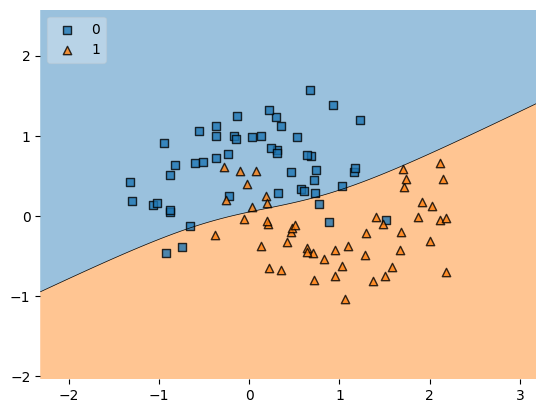

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## using kernal_initialization parameter in keras

In [57]:
model = Sequential()

# model.add(Dense(10,activation='tanh',input_dim=2, kernel_initializer='glorot_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
# model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))

# model.add(Dense(10,activation='tanh',input_dim=2, kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_normal'))

# model.add(Dense(10,activation='relu',input_dim=2, kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))


model.add(Dense(10,activation='relu',input_dim=2, kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))


model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.get_weights()

[array([[ 1.352496  , -0.25495887, -1.5836351 , -1.3427488 , -1.2775885 ,
         -0.50938916, -0.89442295,  0.78704274, -1.1272526 ,  1.113469  ],
        [-0.5932244 ,  0.5353874 , -1.443935  , -0.08294201,  0.84303296,
          1.1578602 , -0.39451516,  1.5300792 ,  0.02764428,  0.27882087]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.61789167,  0.6470982 , -0.3470747 ,  0.6133704 ,  0.3796072 ,
          0.23460066, -0.52647245, -0.35245067,  0.22065687, -0.00365698],
        [ 0.39539385, -0.34340438,  0.65321934,  0.11618608,  0.5759069 ,
          0.5369214 , -0.6995824 , -0.38662225, -0.7447211 ,  0.40894675],
        [ 0.5501219 ,  0.30627322,  0.21098214, -0.6613775 , -0.23933303,
         -0.6320094 ,  0.04716814,  0.5509449 ,  0.48554313,  0.5899701 ],
        [-0.5178337 ,  0.6722783 ,  0.5936854 ,  0.39965463,  0.0556792 ,
          0.15944397, -0.6856392 ,  0.0259462 ,  0.6912925 , -0.12044621],
        [-0.72223

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.4766 - loss: 0.7461 - val_accuracy: 0.5000 - val_loss: 0.8904
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4570 - loss: 0.7436 - val_accuracy: 0.4500 - val_loss: 0.8500
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4977 - loss: 0.6881 - val_accuracy: 0.4500 - val_loss: 0.8135
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5312 - loss: 0.6674 - val_accuracy: 0.5000 - val_loss: 0.7785
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6430 - loss: 0.6399 - val_accuracy: 0.5000 - val_loss: 0.7439
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5844 - loss: 0.6451 - val_accuracy: 0.5000 - val_loss: 0.7103
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5633 - loss: 0.6407 - val_accuracy: 0.5000 - val_loss: 0.6771
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5984 - loss: 0.6202 - val_accuracy: 0.5000 - val_loss

In [60]:
model.get_weights()

[array([[ 1.4512073 , -0.23222944, -1.6700267 , -1.3218219 , -1.3208969 ,
         -0.36983556, -0.8665356 ,  0.71969366, -1.114879  ,  1.2322229 ],
        [-0.79029036,  0.4548571 , -1.3603235 , -0.08529047,  0.83597976,
          1.2379754 , -0.5095909 ,  1.6092498 ,  0.11279155,  0.40795696]],
       dtype=float32),
 array([ 0.08166499,  0.00151117,  0.05914486, -0.0940566 , -0.0730899 ,
         0.01463514,  0.10058677,  0.11408439, -0.06385641,  0.08255559],
       dtype=float32),
 array([[ 0.668853  ,  0.6951174 , -0.30733687,  0.7294741 ,  0.51974446,
          0.2875486 , -0.52647245, -0.3159555 ,  0.2163116 ,  0.13059774],
        [ 0.33938202, -0.41344187,  0.7257184 ,  0.05453712,  0.46810612,
          0.60257655, -0.6995824 , -0.25729015, -0.61358905,  0.54920894],
        [ 0.6406001 ,  0.27197507,  0.24154268, -0.70255154, -0.09805372,
         -0.5777741 ,  0.04716814,  0.5292624 ,  0.5976461 ,  0.604459  ],
        [-0.48947787,  0.6011314 ,  0.6655849 ,  0.33696136, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 908us/step


<Axes: >

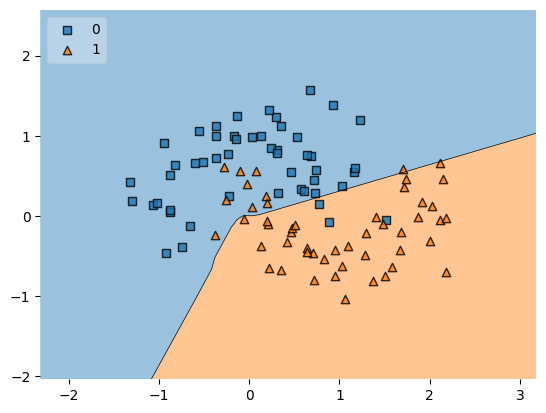

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)